<a href="https://colab.research.google.com/github/GapOscar/Coursera---Heart-atacks/blob/main/Final_proyect_Clasiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final proyect for "Supervised Machine Learning: Classification"
*Exploration of classification algorithms*

In the present document, we will present three distincts methodology to predict if a patient will or will not have a heart atack. For this, wi will import a dataset containing information clinical information of several patients, and a corresponding target variable that registers if the patient had or not a heart atack.

For this data, we will try to classify patients with ***logistic regression***, ***decision tree***, and ***k-nearest neighbors***.

## Data exploration
In this section, we will perform a brief exploration of the data.

In [39]:
# @title Importing packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

raw_data_url = 'https://raw.githubusercontent.com/GapOscar/Coursera---Heart-atacks/main/heart.csv'
df = pd.read_csv(raw_data_url)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Column descriptions

- $age$ : Age of the patient.
- $sex$ : Sex of the patient.
- $exang$: exercise induced angina (1 = yes; 0 = no).
- $ca$: number of major vessels (0-3).
- $cp$: Chest Pain type chest pain type
  - Value 1: typical angina,
  - Value 2: atypical angina,
  - Value 3: non-anginal pain,
  - Value 4: asymptomatic.
- $trtbps$: resting blood pressure (in mm Hg).
- $chol$ : cholestoral in mg/dl fetched via BMI sensor.
- $fbs$ : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
- $rest\_ecg$ : resting electrocardiographic results
  - Value 0: normal,
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
  - Value 2: showing probable or definite left ventricular hypertrophy.
- $thalach$ : maximum heart rate achieved.
- $output$ : 1 = patient had a heart atack, 0 = patient didn't have a heart atack.

In [5]:
# @title Proportions of 1's and 0's in the target variable
# Calculate the proportion of target variable values (1 vs. 0)
target_proportions = df['output'].value_counts(normalize=True)
print("\nProportion of target values:")
print(target_proportions)


Proportion of target values:
output
1    0.544554
0    0.455446
Name: proportion, dtype: float64


The dataset is relatively balanced, with 54.46% of individuals having experienced a heart attack and 45.54% not.

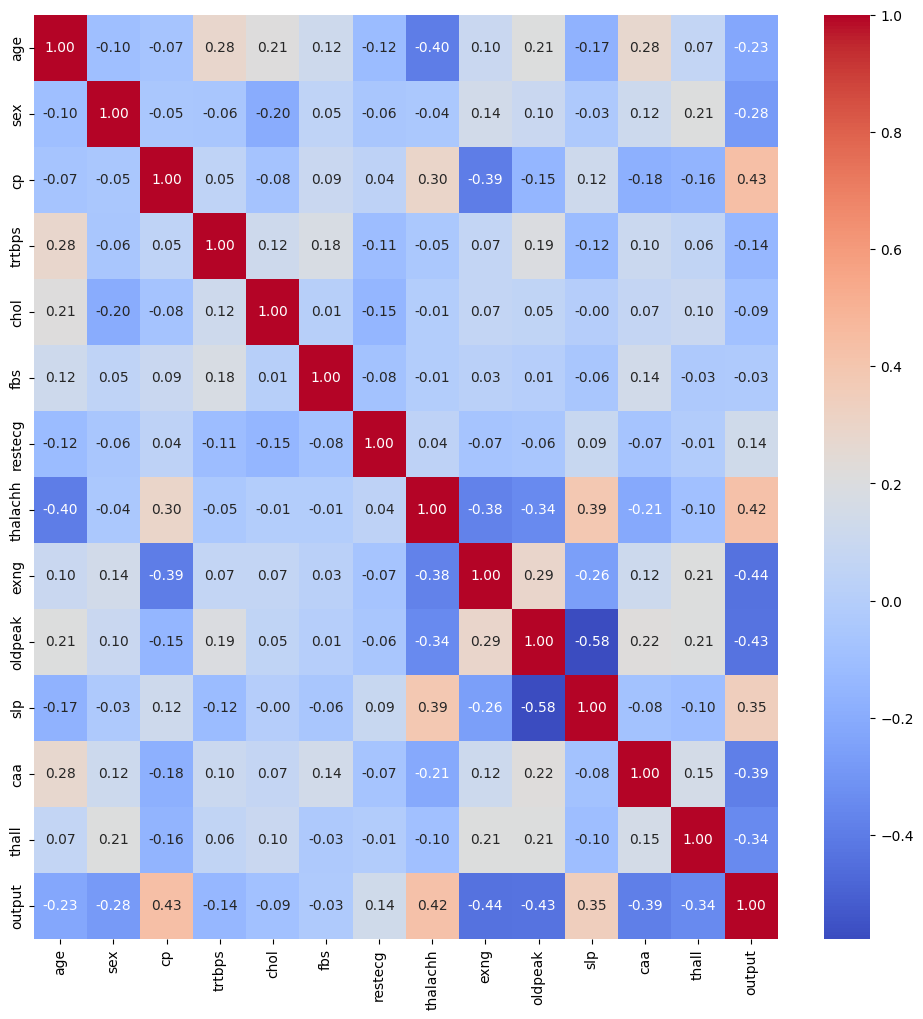

In [11]:
# @title Correlation matrix

# Numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Correlation matrix mapping
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Since correlation is not too big, there are not redundant variables in the data set, so we are not going to udiscard any of them.

In [6]:
# Correlations between features and the target variable
correlations = df.corr()['output'].sort_values(ascending=False)
print("\nCorrelations with the target variable:")
print(correlations)


Correlations with the target variable:
output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


In particular, oldpeak, cp, exng, and thalachh are the more correlated with respect to the objective variable.

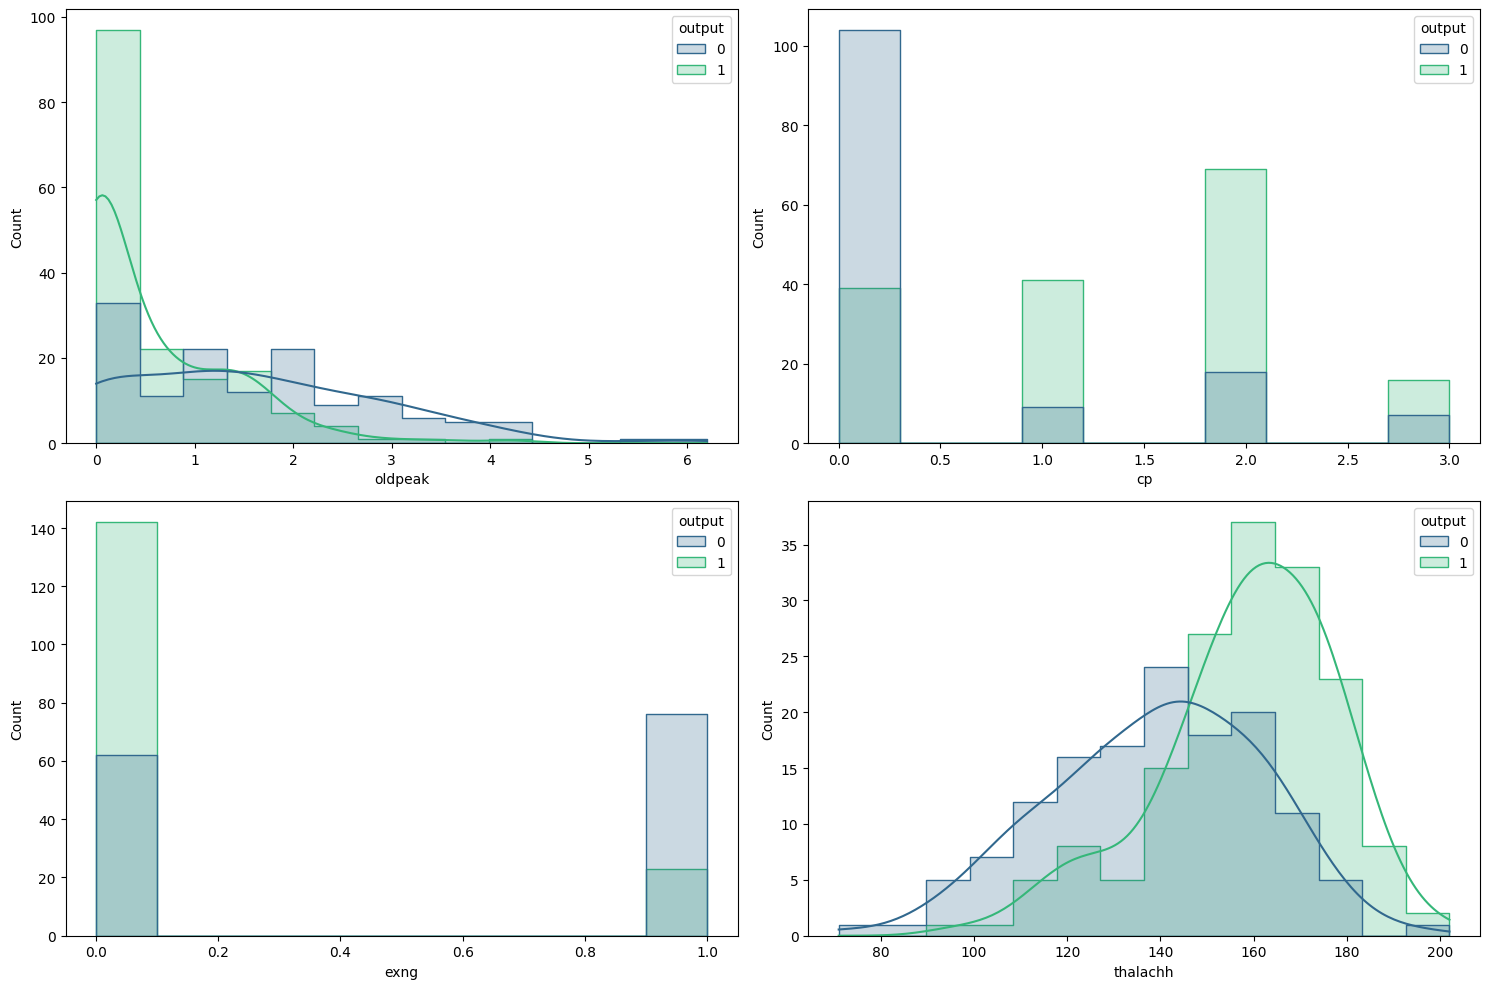

In [42]:
# @title Graphs for the most correlates columns to the target variable (oldpeak, cp, exng, and thalachh)

# Figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# oldpeak in the first subplot
sns.histplot(data=df, x="oldpeak", hue="output", palette="viridis", kde=True, element="step", ax=axes[0, 0])

# cp in the second subplot
sns.histplot(data=df, x="cp", hue="output", palette="viridis", kde=False, element="step", ax=axes[0, 1])

# exng in the third subplot
sns.histplot(data=df, x="exng", hue="output", palette="viridis", kde=False, element="step", ax=axes[1, 0])

# thalachh in the fourth subplot
sns.histplot(data=df, x="thalachh", hue="output", palette="viridis", kde=True, element="step", ax=axes[1, 1])

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


## Model training

Spliting the data for train and test, keeping the outputs proportion

In [15]:
# prompt: split data in test and train, with training having 80% of register and using a seed in 42. Make this partition keeping the train and test sets with a similar proportion of 1 vs 0 output to the observed in the total data
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

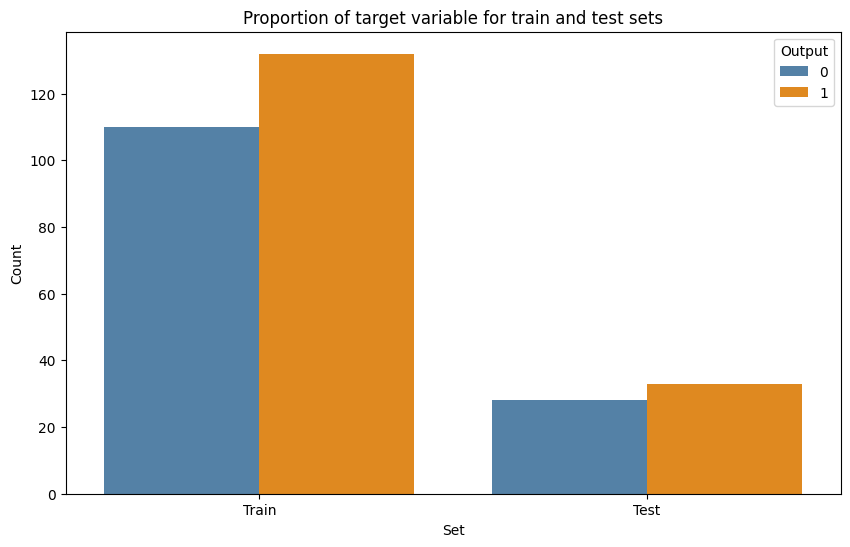

Training set size: 242
Proportion of 1's in training set: 0.55
Testing set size: 61
Proportion of 1's in testing set: 0.54


In [56]:
# @title Proportion of the target variable in the training and testing sets

# Create a DataFrame for the train and test counts
train_counts = pd.DataFrame({'Set': 'Train', 'Output': y_train})
test_counts = pd.DataFrame({'Set': 'Test', 'Output': y_test})

# Combine the dataframes
combined_counts = pd.concat([train_counts, test_counts])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_counts, x='Set', hue='Output', palette=['steelblue', 'darkorange'])
plt.title('Proportion of target variable for train and test sets')
plt.xlabel('Set')
plt.ylabel('Count')
plt.legend(title='Output', labels=['0', '1'])
plt.show()

print("Training set size:", len(y_train))
print("Proportion of 1's in training set:", round(y_train.mean(),2))
print("Testing set size:", len(y_test))
print("Proportion of 1's in testing set:", round(y_test.mean(),2))

Notice that the target proportion is similar to the initial sample.

Finally, we train the ***logistic regression***, ***decision tree***, and ***k-nearest neighbors***. models to predict future heart atacks, and compute the accuracy obtained with each model.

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth = 5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Dictionary with model and accuracies
data = {'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
        'Accuracy': [accuracy_logreg, accuracy_knn, accuracy_dt]}

pd.DataFrame(data).sort_values(by = 'Accuracy', ascending = False)


,Model,Accuracy
0,Logistic Regression,0.803279
2,Decision Tree,0.786885
1,K-Nearest Neighbors,0.590164


Following the accuracy test, the logistic regression raises as the most predictive model.

## Further analysis

Not only beacuse of the accuracy, but for the flexibility and interpretability fo the model, I reccomend a logistic regression over other clasification models, making possible the creaton of scores to explain and clasify cases not only by its predicted result, but for the posibbility of comparing which case is closer to thriger an event.



As aditional analysis, accuracy could be improved adding further details. For the logistic regression, binnig variables into their corresponding woes would be recommendable; for the other two models, a grid may be used to search for the best properties of the model (such as tree depth, or number neighbors)